In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/StudentsPerformance.csv")
print("Initial data shape:", df.shape)
df.head()

Initial data shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print("Missing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [10]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

In [11]:
df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1, inplace=True)


In [12]:
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])


In [13]:
X = df.drop('pass', axis=1)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.865

Confusion Matrix:
 [[  0  27]
 [  0 173]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.93      0.50      0.46       200
weighted avg       0.88      0.86      0.80       200



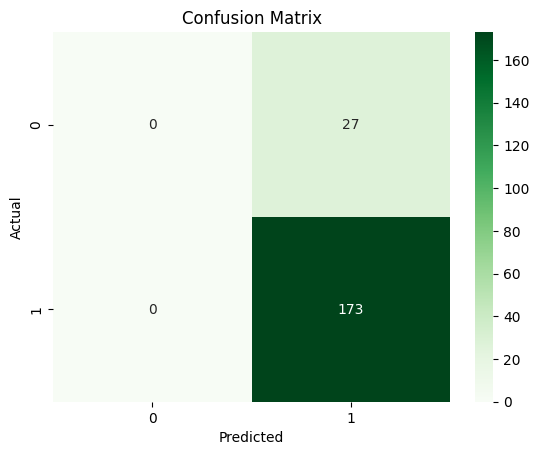

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
joblib.dump(model, "student_pass_model.pkl")
print("Model saved as student_pass_model.pkl")

Model saved as student_pass_model.pkl
